<div>
  <img style="height: 600px;" src="data/frequentists_vs_bayesians.png" />
</div>

# Introduction to Bayesian Statistics

Anton Stratmann, 2nd year

### Roadmap

1. Understanding Bayes' Theorem
2. Priors
3. Towards application

### Assumptions matter

- The Frequetist calculates $\mathbb{P}\left(\, \text{"Positive"} \, \big| \, \text{"Sun Exploded"} \, \right)$

- But, we are interested in $\mathbb{P}\left(\, \text{"Sun Exploded"} \, | \, \text{"Positive"} \, \right)$

- Sun Explosion is an unlikely event &rarr; Account for that

### Tree Diagram

In [2]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(
    Image(
      url="https://mermaid.ink/img/"
      + base64_string,
      width=600
    )
  )

In [3]:
mm("""graph LR; A(( )) --A--> B(Sun Exploded); A --1-A--> C(Sun Not Exploded); B --35/36--> D(Positive); B --1/36--> E(Negative); C --1/36--> F(Positive); C --35/36--> G(Negative)""")

### Deriving Bayes' Theorem

- How can we get $\mathbb{P}\left(\,\text{"Sun Exploded"} \, \big| \, \text{"Positive"} \, \right)$?

- Use laws of conditional probability: $\mathbb{P}\left(\, B \, \big| \, A \, \right) = \frac{\mathbb{P}\left(\, B \, \bigcap \, A \, \right)}{\mathbb{P}\left(\, A \, \right)}$
- And by replacing
    - $\mathbb{P}\left(\, B \, \bigcap \, A \, \right) = \mathbb{P}\left(\, A \, \big| \, B \, \right) \cdot \mathbb{P}\left(\, B \, \right)$
    - $\mathbb{P}\left(\, B \, \right) = \mathbb{P}\left(\, B \, \big| \, A \, \right) \cdot \mathbb{P}\left(\, A \, \right) + \mathbb{P}\left(\, B \, \big| \, \neg A \, \right) \cdot \mathbb{P}\left(\, \neg A \, \right)$

#### Bayes' Theorem: $$\mathbb{P}\left(\, B \, \big| \, A \, \right) = \frac{\mathbb{P}\left(\, A \, \big| \, B \, \right) \cdot \mathbb{P}\left(\, B \,\right)}{\mathbb{P}\left(\, A \, \big| \, B \, \right) \cdot \mathbb{P}\left(\, B \, \right) + \mathbb{P}\left(\, A \, \big| \, \neg B \, \right) \cdot \mathbb{P}\left(\, \neg B \, \right)}$$

*Note*: In our case $\mathbb{P}\left(\, B \,\right)$ is the probability, that the sun explodes.

### Bayes' Theorem for densities

- Sets have limited application &rarr; We need a more general Bayes' Theorem

- Bayes' Theorem also holds for probability densities
- It can be applied easily to parametric models

<div style="padding: 10px; padding-left: 50px; background: #D3D3D3;">
    Given some data $\mathbf{y}$ and parameters $\boldsymbol\theta$ that have a common probability density $p\big(\mathbf{y}, \boldsymbol\theta\big)$. Then, we obtain
    $$p\left(\boldsymbol\theta \, \big| \, \mathbf{y}\right) = \frac{p\left(\mathbf{y} \, \big| \, \boldsymbol\theta\right) \cdot p\left(\boldsymbol\theta\right)}{p\left(\mathbf{y}\right)}$$
    also called Bayes' Theorem. 
</div>

- $p\left(\boldsymbol\theta\right)$ is called *prior*, $p\left(\mathbf{y} \, \big| \, \boldsymbol\theta\right)$ *likelihood* and $p\left(\boldsymbol\theta \, \big| \, \mathbf{y}\right)$ *posterior*

### Implications

- In Bayesian statistics, parameters are random
- Their distribution is updated from *prior* to *posterior* density

- The *prior* encodes assumptions!

### Notes on Application
- *likelihood* and *prior* are known 
- *posterior* is known up to a constant factor &rarr; Normalization is hard (high-dimensional integral)
- Circumvent normalization
- *likelihood* and *prior* densities only need to be known up to a constant factor
- Work with log densities: $\log p\left(\mathbf{y} \, \big| \, \boldsymbol\theta\right) \cdot p\left(\boldsymbol\theta\right) = \log p\left(\mathbf{y} \, \big| \, \boldsymbol\theta\right) + \log p\left(\boldsymbol\theta\right)$

### Frequentism

- Frequentism is a statistical paradigm present since the early 20th century
- Tought in the average statistics lecture
- Universal tools: maximum likelihood theory, hypothesis testing

- **Aim**: eliminate subjective view, objective statistics

- **Key concept**: Uncertainty arises because we observe limited (subsets of) data

### Similarities

- Both have common mathematical base
- Maximum likelihood theory is closely linked to Bayesian inference
    - Likelihood function used for MLE &lrarr; Bayesian likelihood density
    - Asymptotic normality has implications for both
- Both paradigms can yield similar results

### Differences

1. Frequentist statistics does not incorporate assumptions (officially ;))

2. Bayesian statistics does not have ground truth parameters

3. Bayesian statistics generally require more computational resources, but is much more versatile

## Priors

We discuss, how
- priors encode assumptions
- priors can be interpreted as regularizers
- to choose a prior

### Optimization is often Maximum Likelihood
- Example: Weighted Least Squares (WLS) 
    $$\big(F(\boldsymbol \theta) - \mathbf{y}\big)^\top \mathbf{\Sigma}^{-1} \big(F(\boldsymbol \theta) - \mathbf{y}\big) = \sum_{i = 0}^N \left( \frac{F_i(\boldsymbol \theta) - y_i}{\sigma_i} \right)^2$$
    
- We can now see that
    $$\frac{1}{\sqrt{(2 \pi)^n |\mathbf{\Sigma}|}} \mathrm{exp}\left(-\frac{1}{2}\big(F(\boldsymbol \theta) - \mathbf{y}\big)^\top \mathbf{\Sigma}^{-1} \big(F(\boldsymbol \theta) - \mathbf{y}\big)\right)$$
  is a Gaussian density
  
- Minimum of WLS is an MLE assuming Normal-distributed data $\mathbf{y} \sim \mathcal{N}\big(F(\boldsymbol \theta), \mathbf{\Sigma}\big)$
- Can also be used as Bayesian *likelihood*

### Problems are often Ill-Conditioned
- Example: Standard linear least squares ($ \min_{\boldsymbol \theta} ||\mathbf{A} \cdot \boldsymbol \theta - \mathbf{b}||^2_2 $) with Matrix
$$ F(\boldsymbol \theta) = 
    \begin{pmatrix} 
        -2 & 1 & 0 & \cdots & \cdots & \cdots & 0 \\ 
         1 & -2 & 1 & 0 & \cdots & \cdots & 0 \\
         0 & 1 & -2 & 1 & 0 & \dots & 0 \\ 
         \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
         0 & \cdots & 0 & 1 & -2 & 1 & 0 \\ 
         0 & \cdots & \cdots & 0 & 1 & -2 & 1 \\ 
         0 & \cdots & \cdots &\cdots & 0 & 1 & -2 
    \end{pmatrix} \cdot \boldsymbol \theta$$
- Bad condition: Errors in input data are amplified

### Solution: Regularization
- Idea: trade approximation quality for less error amplification
- Tikhonov/L2 regularization: solve instead
    $$\min_{\boldsymbol \theta} ||\mathbf{A} \cdot \boldsymbol \theta - \mathbf{b}||^2_2 + \alpha \cdot ||\boldsymbol \theta||^2_2$$

### This looks like a prior!
- Closely look at
    $$\min_{\boldsymbol \theta} ||\mathbf{A} \cdot \boldsymbol \theta - \mathbf{b}||^2_2 + \alpha \cdot ||\boldsymbol \theta||^2_2$$
- $-||\mathbf{A} \cdot \boldsymbol \theta - \mathbf{b}||^2_2$ is proportional to a Normal log-density
- For $-\alpha \cdot ||\boldsymbol \theta||^2_2$ the same holds: It corresponds to a prior $\boldsymbol \theta \sim \mathcal{N}(\mathbf{0}, \frac{1}{\alpha} \cdot \mathbf{I})$

### How to choose a prior?

- Unfortunately, it is not always easy
- Often problem-dependend &rarr; Investigation and use of existing knowledge necessary
- Popular choices can narrow down
- Still, it is always necessary to check your prior!

### Informativesness

- Important classification for priors
- Generally, informativeness encodes how strong initial assumptions are

Assume that $\boldsymbol\theta$ is bounded to $\big[0, 1\big]$ and expected at $\frac{1}{2}$:

In [3]:
import numpy as np
import scipy

def plot_pdf(t, samples, ax):
    ax.plot(t, samples)
    ax.fill_between(t, 0, samples, color="#aaaadd", alpha=0.5)

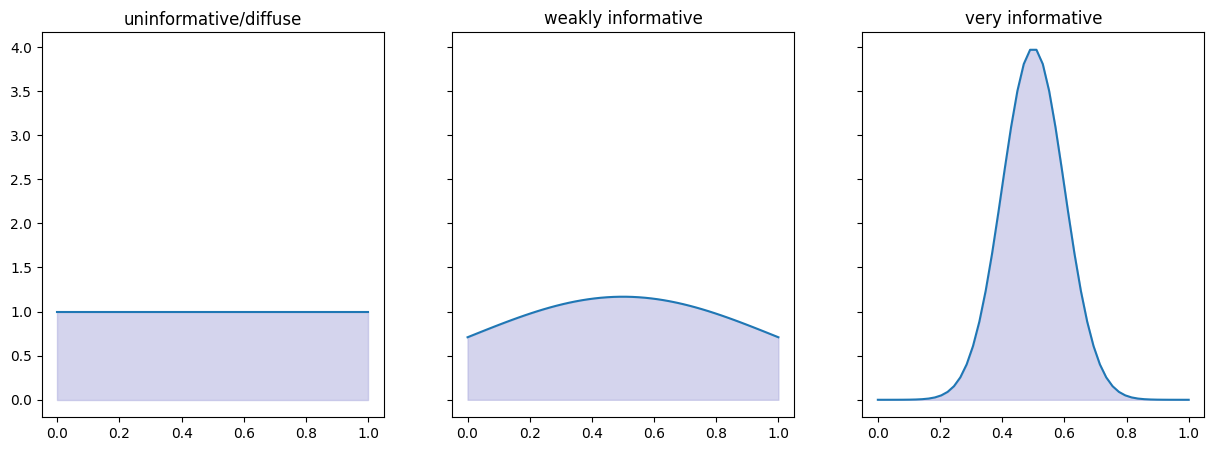

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(15, 5))
t = np.linspace(0, 1)
plot_pdf(t, scipy.stats.uniform.pdf(t, 0, 1), axs[0])
axs[0].set_title("uninformative/diffuse")
plot_pdf(t, scipy.stats.truncnorm.pdf((t - 0.5) / 0.5, (0 - 0.5) / 0.5, (1 - 0.5) / 0.5) / 0.5, axs[1])
axs[1].set_title("weakly informative")
plot_pdf(t, scipy.stats.truncnorm.pdf((t - 0.5) / 0.1, (0 - 0.5) / 0.1, (1 - 0.5) / 0.1) / 0.1, axs[2])
axs[2].set_title("very informative")
plt.show()

### Regularizing Priors

spike-and-slab, horse shoe

### Conjugate Priors
> A conjugate prior is an algebraic convenience, [...]; otherwise, numerical integration may be necessary. - *Wikipedia*
- Choose prior such that posterior is from the same distribution family
- Posterior distribution can be computed very efficiently!
- Works for some combinations of simple likelihoods and priors

### Prior Predictive Checks

- How can we check, if the prior is generally suitable?
- Check if prior + model can reproduce data!

## Bayesian Statistics in Application

How can we do inference in general, application-oriented scenarios?
1. Circumvent posterior normalization &rarr; Markov Chain Monte Carlo (MCMC)
2. Check assumptions &rarr; Posterior Predictive Checks

### Markov Chain Monte Carlo

- Markov chains: special stochastic processes
- Monte Carlo: Integration by random sampling
- In a nice setting, Markov chains can produce (correlated) samples of the posterior distribution 
- Samples are used with Monte Carlo integration to approximate characteristics. E.g.
    - Expectation and variance
    - Quantiles

### Posterior Predictive Checks

- "A posteriori" check, if assumptions of Bayesian analysis are correct
- How well is the data reproduced? Do error assumptions hold?
- Should always be done